### 1. Можно ли отобрать наиболее значимые признаки из имеющихся с помощью PCA? Ответ объясните.

Ответ: Нет, нельзя. Потому что <font color="magenta">*__метод PCA не осущетсвляет отбор признаков. Метод PCA создает новые признаки,__*</font> которые теряют свою предметную интерпритацию.

Features матрицы "объекты-признаки" образуют ортогональный базис пространства. Изначально это понятные сущности: длина, ширина чашелистиков, лепестков, цены и т.д.

Метод PCA строит (создает) новый базис этого пространства на основе собственных векторов - этот новый базис, к слову сказать, вовсе не обязан даже быть ортогональным, т.е. собственные вектора исходной матрицы "объекты-признаки" не обязательно будут ортогональные друг другу (во всяком случае линейной алгебре допускаются ситуации когда собственные вектора неортогональны друг другу, или их может оказаться недостаточно чтобы построить базис пространства, или их может не быть вовсе, или их будет бесконечное множество).

Таким образом после перехода к новому базису на основе собственных векторов новые признаки становится невозможно связать с сущностями из окружающего нас мира. Новые признаки это просто feature1, feature2 и т.д. - это максимум что мы можем сделать для ниж. Потом из этого пока что полного набора признаков выбирается подмножество признаков (соответствующих максимальным собственным значениям) и на их основе строится новое подпространство.

#### 2. (\*) Написать свою реализацию метода главных компонент с помощью сингулярного разложения с использованием функции [numpy.linalg.svd()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html). Применить к данным на уроке и сравнить ответы.

In [1]:
import numpy as np
from sklearn import datasets
from matplotlib import pyplot as plt
plt.rcParams["figure.facecolor"] = "green"
iris = datasets.load_iris()
X = iris.data
X.shape

(150, 4)

In [2]:
# стандартизируем признаки
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_ = scaler.fit_transform(X)
X_[:6]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ],
       [-0.53717756,  1.93979142, -1.16971425, -1.05217993]])

Что мы делаем:

Для начала нам нужно найти собственные значения и собственные вектора матрицы ковариации отмаштабированной матрицы "объекты-признаки" `X_`. Собственные вектора (и собственные значения) можно найти либо прямым образом - как мы делали на уроке, либо используя сингулярное разложение исходной (маштабированной) матрицы "объекты-признаки" `X_`.

Мы знаем, что собственные вектора матрицы ковариаций $X\_^T \cdot X\_$ являются правые сингулярные векторы отмаштабироанной матрицы $X\_$, т.е. столбцы матрицы $V$ из формулы сингулярного разложения:
$$A = UDV^T$$
а собственные значения матрицы ковариаций будут квадраты сингулярных чисел матрицы $X\_$

Таким образом нам нужно получить сингулярное разложение матирцы $X\_$ и отобрать столбцы матрицы $V$ соответствующие наибольшим квадратам сингулярных чисел - мы составим из этих столбцов матрицу $W^T$;

Чтобы получить новую матрицу "объекты-признаки" $Z$ - выполним матричное умножение:
$$Z=X\_W^T.$$

вуаля, все должно сойтись с тем что было на уроке.

In [3]:
# выполняем сингулярное разложение с помощью numpy.linalg
np.set_printoptions(precision=4, suppress=True)
u, s, vh = np.linalg.svd(X_)

In [4]:
# получаем диагональную матрицу D
D = np.zeros_like(X_)
ind = list(range(4))
D[ind, ind] = s

In [5]:
# получим из матрицы сингулярного разложения VT матрицу V транспонируя VT;
v = vh.T

In [6]:
# для начала проверим, что перемножим получившиеся матрицы мы получим исходную.
(u@D@vh)[:6,:]

array([[-0.9007,  1.019 , -1.3402, -1.3154],
       [-1.143 , -0.132 , -1.3402, -1.3154],
       [-1.3854,  0.3284, -1.3971, -1.3154],
       [-1.5065,  0.0982, -1.2834, -1.3154],
       [-1.0218,  1.2492, -1.3402, -1.3154],
       [-0.5372,  1.9398, -1.1697, -1.0522]])

In [7]:
# проверим перемножение матриц V@D@D@VT получим ковариационную матрицу X_.T@X_
v@D[:4]@D[:4]@vh

array([[150.    , -17.6355, 130.7631, 122.6912],
       [-17.6355, 150.    , -64.266 , -54.9189],
       [130.7631, -64.266 , 150.    , 144.4298],
       [122.6912, -54.9189, 144.4298, 150.    ]])

In [8]:
"""Видно что матрицы идентичны. 
Значит сингулярное разложение может помочь нам преобразовать исходную матрицу, выполнив понижение 
размерности признаков с помощью собственных векторов матрицы ковариаций.
"""

X_.T@X_

array([[150.    , -17.6355, 130.7631, 122.6912],
       [-17.6355, 150.    , -64.266 , -54.9189],
       [130.7631, -64.266 , 150.    , 144.4298],
       [122.6912, -54.9189, 144.4298, 150.    ]])

In [9]:
vh.T@D[:4]@D[:4]
X_.T@X_@vh.T
# эти матрицы, свидетельствующие о близости собственных векторов и их значений 
# с сингулярным разложением матрицы, тоже равны.

array([[ 228.1095,  -51.7457,   15.8402,    0.8119],
       [-117.9135, -126.5881,   -5.3797,   -0.3838],
       [ 254.0902,   -3.3579,   -3.1287,   -2.4903],
       [ 247.2799,   -9.1781,  -13.9626,    1.6269]])

Выполним понижение размерности имея в виду что $W^T = V$ - составим матрицу $W^T$ из первых двух правых сингулярных векторов исходной матрицы ($X\_$) соответствующих максимальным (по модулю) сингулярным числам.

In [10]:
# выполним понижение размерности оставив только 2 признака;
Z = X_@v[:,:2]
print(f"размерность новой матрицы Z: {Z.shape}\n")
print(f"Ниже первые шесть объектов новой матрицы Z:\n"
     f"{Z[:6]}\n"
     f"\nвуаля, все сходится с тем что мы получили на уроке!")

размерность новой матрицы Z: (150, 2)

Ниже первые шесть объектов новой матрицы Z:
[[-2.2647 -0.48  ]
 [-2.081   0.6741]
 [-2.3642  0.3419]
 [-2.2994  0.5974]
 [-2.3898 -0.6468]
 [-2.0756 -1.4892]]

вуаля, все сходится с тем что мы получили на уроке!


#### 3. (\*) Обучить любую модель классификации (из рассмотренных в курсе) на датасете IRIS до применения PCA и после него. Сравнить качество классификации по отложенной выборке.

In [11]:
class my_DecisionTreeClassifier:
    
    def __init__(self, criterion="gini", min_samples_leaf=1, max_leaf_nodes=None):
        self.criterion = criterion
        self.min_samples_leaf = min_samples_leaf
        self.max_leaf_nodes = max_leaf_nodes
        
    def fit(self, data, labels, max_depth=None, subset_feats_flag=False):
        self.max_depth = max_depth
        quality, t, index = Node.find_best_split(self, data, labels, subset_feats_flag)
        if (t is None) or (index is None):
            return Leaf(data, labels)
        true_data, false_data, true_labels, false_labels = Node.split(data, labels, index, t)
        if (len(true_data) <= self.min_samples_leaf) or (len(false_data) <= self.min_samples_leaf):
            return Leaf(data, labels)
        if max_depth is not None:
            if max_depth != 0:
                max_d = max_depth - 1
                true_branch = my_DecisionTreeClassifier.fit(self, true_data, true_labels, 
                                                            max_depth=max_d)
                false_branch = my_DecisionTreeClassifier.fit(self, false_data, false_labels, 
                                                             max_depth=max_d)
            else:
                return Leaf(data, labels)
        else:
            true_branch = my_DecisionTreeClassifier.fit(self, true_data, true_labels)
            false_branch = my_DecisionTreeClassifier.fit(self, false_data, false_labels)
        self.dtree = Node(index, t, true_branch, false_branch)
        return self.dtree
    
    @staticmethod
    def classify_obj(obj, node):
        if isinstance(node, Leaf):
            answer = node.prediction
            return answer
        if obj[node.index] <= node.t:
            return my_DecisionTreeClassifier.classify_obj(obj, node.true_branch)
        else:
            return my_DecisionTreeClassifier.classify_obj(obj, node.false_branch)
    
    def labels_predict(self, X, tree=None):
        if tree is None:
            tree = self.dtree
        pred_vec = []
        for obj in X:
            pred_val = my_DecisionTreeClassifier.classify_obj(obj, tree)
            pred_vec.append(pred_val)
        return pred_vec
    
######    
class Leaf:
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels
        self.prediction = self.predict()
    def predict(self):
        classes = {}
        for label in self.labels:
            if label not in classes:
                classes[label] = 0 
            classes[label] += 1
        prediction = max(classes, key=classes.get)
        return prediction
    
######    
class Node:
    def __init__(self, index, t, true_branch, false_branch):
        self.index = index
        self.t = t
        self.true_branch = true_branch
        self.false_branch = false_branch

    @staticmethod
    def gini(labels):
        classes = {}
        for label in labels:
            if label not in classes:
                classes[label] = 0
            classes[label] += 1
        impurity = 1
        for label in classes:
            p = classes[label] / len(labels)
            impurity -= p ** 2
        return impurity
    
    @staticmethod
    def entropy(labels):
        classes = {}
        for label in labels:
            if label not in classes:
                classes[label] = 0
            classes[label] += 1
        entropy_index = 0
        for label in classes:
            p = classes[label] / len(labels)
            entropy_index -= 0 if p == 0 else p*np.log2(p)
        return entropy_index

    @staticmethod
    def quality(left_labels, right_labels, criterion, current_criteria):
        weig = float(left_labels.shape[0]) / (left_labels.shape[0] + right_labels.shape[0])
        if criterion == 'gini':
            return current_criteria - weig * Node.gini(left_labels) \
                                                                - (1 - weig) * Node.gini(right_labels)
        elif criterion == 'entropy':
            return current_criteria - weig * Node.entropy(left_labels) \
                                                                - (1 - weig) * Node.entropy(right_labels)
    
    @staticmethod
    def split(data, labels, index, t):
        left = np.where(data[:, index] <= t)
        right = np.where(data[:, index] > t)
        true_data = data[left]
        false_data = data[right]
        true_labels = labels[left]
        false_labels = labels[right]
        return true_data, false_data, true_labels, false_labels
    
    def find_best_split(self, data, labels, subset_feats_flag=False):
        if self.criterion == 'gini':
            current_criteria = Node.gini(labels)
        elif self.criterion == 'entropy':
            current_criteria = Node.entropy(labels)
        best_quality = 0
        best_t = None
        best_index = None
        k = (int(np.sqrt(data.shape[1])) if subset_feats_flag else data.shape[1])
        for index in random.sample(range(data.shape[1]), k=k):
            t_values = np.unique([row[index] for row in data])
            for t in t_values:
                true_data, false_data, true_labels, false_labels = Node.split(data, labels, index, t)
                if len(true_data) < self.min_samples_leaf or len(false_data) < self.min_samples_leaf:
                    continue
                current_quality = Node.quality(true_labels, false_labels, 
                                               self.criterion, current_criteria)
                if current_quality > best_quality:
                    best_quality, best_t, best_index = current_quality, t, index
        return best_quality, best_t, best_index

    @staticmethod
    def accuracy_metric(actual, predicted):
        correct = 0
        for i in range(len(actual)):
            if actual[i] == predicted[i]:
                correct += 1
        return correct / float(len(actual))

In [12]:
import random
y_labels = iris.target
dt_cls = my_DecisionTreeClassifier()
dt_cls.fit(X_, y_labels)
pred = dt_cls.labels_predict(X_)
print(f"Standart method Accuracy metric value is: {dt_cls.dtree.accuracy_metric(y_labels, pred)}")

Standart method Accuracy metric value is: 0.98


In [13]:
dt_cls_PCA = my_DecisionTreeClassifier()
dt_cls_PCA.fit(Z, y_labels)
pred_Z = dt_cls_PCA.labels_predict(Z)
print(f"PCA method Accuracy metric value is: {Node.accuracy_metric(y_labels, pred_Z)}")

PCA method Accuracy metric value is: 0.98


In [14]:
class my_RandomForestClassifier(my_DecisionTreeClassifier):
    
    def __init__(self, n_trees=10):
        self.n_trees = n_trees

    def get_bootstrap(self, X, y, N=None):
        if N is None: N = self.n_trees
        random.seed(29)
        n_samples = X.shape[0]
        bootstrap_set = []
        for _ in range(N):
            indices = random.choices(range(n_samples), k=n_samples)
            bootstrap_set.append((X[indices], y[indices]))
        return bootstrap_set
    
    def oob_bootstrap(self, X, y, N=None):
        if N is None: N = self.n_trees
        random.seed(29)
        n_samples = X.shape[0]
        bootstrap_set = []
        oob_set = []
        oob_inv_ind = []
        for _ in range(N):
            indices = random.choices(range(n_samples), k=n_samples)
            inv_indices = [val for val in range(n_samples) if not val in set(indices)]
            oob_set.append((X[inv_indices], y[inv_indices]))
            oob_inv_ind.append(inv_indices)
            bootstrap_set.append((X[indices], y[indices]))
        self.oob_inv_ind = oob_inv_ind
        self.oob_set = oob_set
        return bootstrap_set
    
    """данный метод не потребовался; я внес изменения в надкласс my_DecisionTreeClassifier, 
       а конкретно в метод find_best_split();"""
    #     @staticmethod
    #     def get_feats_subset(num_feats):
    #         num_subfeats = int(np.sqrt(num_feats))
    #         subfeat_inds = random.sample(range(num_feats), k=num_subfeats)
    #         return subfeat_inds
    
    def randomforest_build(self, X, y, n_trees=None):
        if n_trees is None: n_trees = self.n_trees
        forest = []
        bs_set = my_RandomForestClassifier.oob_bootstrap(self, X, y, n_trees)
        for bs_X, bs_y in bs_set:
            cls = my_DecisionTreeClassifier()
            forest.append(cls.fit(bs_X, bs_y, subset_feats_flag=True))
        return forest
    
    def tree_vote(self, forest, data):
        pred = []
        for tree in forest:
            pred.append(my_DecisionTreeClassifier.labels_predict(self, data, tree))
        pred_per_obj = list(zip(*pred))
        voted_pred = []
        for obj in pred_per_obj:
            voted_pred.append(max(obj, key=obj.count))
        return voted_pred
    
    def oob_vote(self, forest):
        oob_pred = []
        oob_set = self.oob_set
        oob_inv_ind = self.oob_inv_ind
        for num, tree in enumerate(forest):
            oob_pred.append(my_DecisionTreeClassifier.labels_predict(self, oob_set[num][0], tree))
        oob_dict_pred = {}
        oob_dict_actu = {}
        for pos, p in enumerate(oob_pred):
            for num, val in enumerate(p):
                if oob_inv_ind[pos][num] not in oob_dict_pred:
                    oob_dict_pred[oob_inv_ind[pos][num]] = [val]
                    oob_dict_actu[oob_inv_ind[pos][num]] = oob_set[pos][1][num]
                else:
                    oob_dict_pred[oob_inv_ind[pos][num]].append(val)
        for k, v in oob_dict_pred.items():
            oob_dict_pred[k] = max(v, key=v.count)
        oob_pred_list = list(oob_dict_pred.values())
        oob_actu_list = list(oob_dict_actu.values())
        return oob_actu_list, oob_pred_list  # oob_dict_pred, oob_dict_actu

In [15]:
rf_cls = my_RandomForestClassifier()
forest1 = rf_cls.randomforest_build(X_, y_labels)
pred1 = rf_cls.tree_vote(forest1, X_)
accuracy1 = forest1[0].accuracy_metric(y_labels, pred1)
print(f"Standart method accuracy method is: {accuracy1:.4f}")
print(f"Accuracy check: {Node.accuracy_metric(y_labels, pred1):.4f}")

Standart method accuracy method is: 0.9800
Accuracy check: 0.9800


In [16]:
rf_cls_PCA = my_RandomForestClassifier()
forest2 = rf_cls_PCA.randomforest_build(Z, y_labels)
pred2 = rf_cls.tree_vote(forest2, Z)
accuracy2 = forest2[0].accuracy_metric(y_labels, pred2)
print(f"PCA method accuracy value is: {accuracy2:.4f}")
print(f"Accuracy check: {Node.accuracy_metric(y_labels, pred2):.4f}")

PCA method accuracy value is: 0.9733
Accuracy check: 0.9733


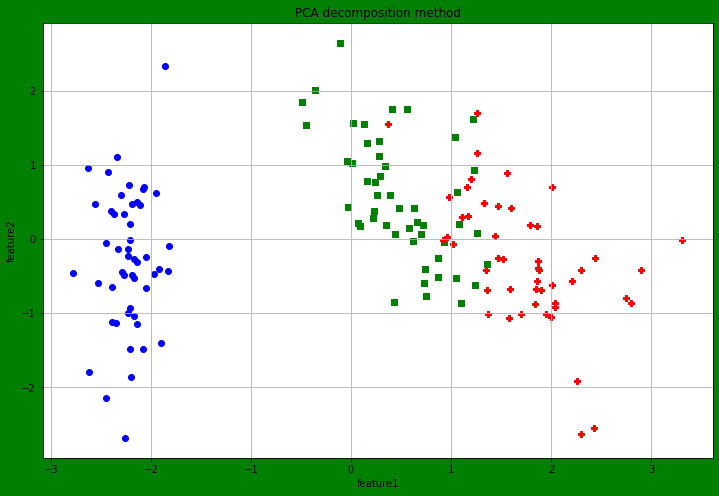

In [21]:
plt.figure(figsize=(12,8))
for c, m, i in zip("bgr", "osP", range(3)):
    plt.scatter(Z[y_labels==i, 0], Z[y_labels==i, 1], c=c, marker=m)
plt.xlabel("feature1")
plt.ylabel("feature2")
plt.title("PCA decomposition method")
plt.grid()
plt.show()

<font color="yellow" size=3.5 face="serif">Вывод: Как видно по метрикам разница в использовании данных до и после понижения размерности методом PCA - почти (значимо) не отличаются.</font>

#### 4. Принять участие в соревнованиях я к сожалению не смог((